#  Project 2 - Ames Housing Data and Kaggle Challenge

## Objective

The goal of this project is to predict the price sale of the house .

## Importing libaries

In [1]:
# First I have to import the different libraries that  I will be using.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression,LassoCV, RidgeCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics


## Load Data


In [3]:
housing_train = pd.read_csv('./datasets/train.csv')
housing_test = pd.read_csv('./datasets/test.csv')

In [4]:
housing_test.shape

(879, 80)

In [5]:
housing_train.shape

(2051, 81)

In [6]:
housing_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
housing_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [8]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
housing_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [9]:
housing_train.shape

(2051, 81)

In [10]:
pd.options.display.max_columns = None

housing_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

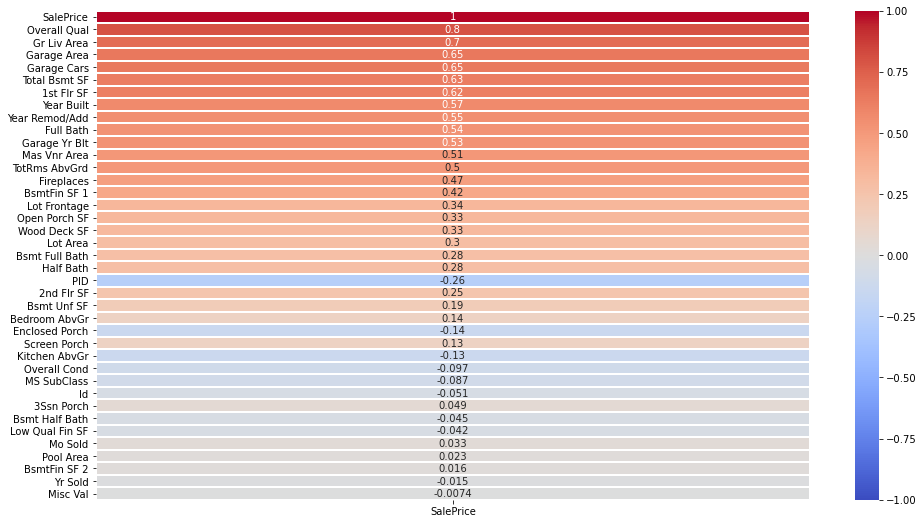

In [11]:
plt.figure( figsize=(16,9))

sns.heatmap(housing_train.corr()[['SalePrice']].sort_values(by='SalePrice' ,key=abs, ascending=False),annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1);

According to the heatmap of correlation , I am going to use the colomuns with more than |0.250|correlation with the saleprice.

<Figure size 1152x648 with 0 Axes>

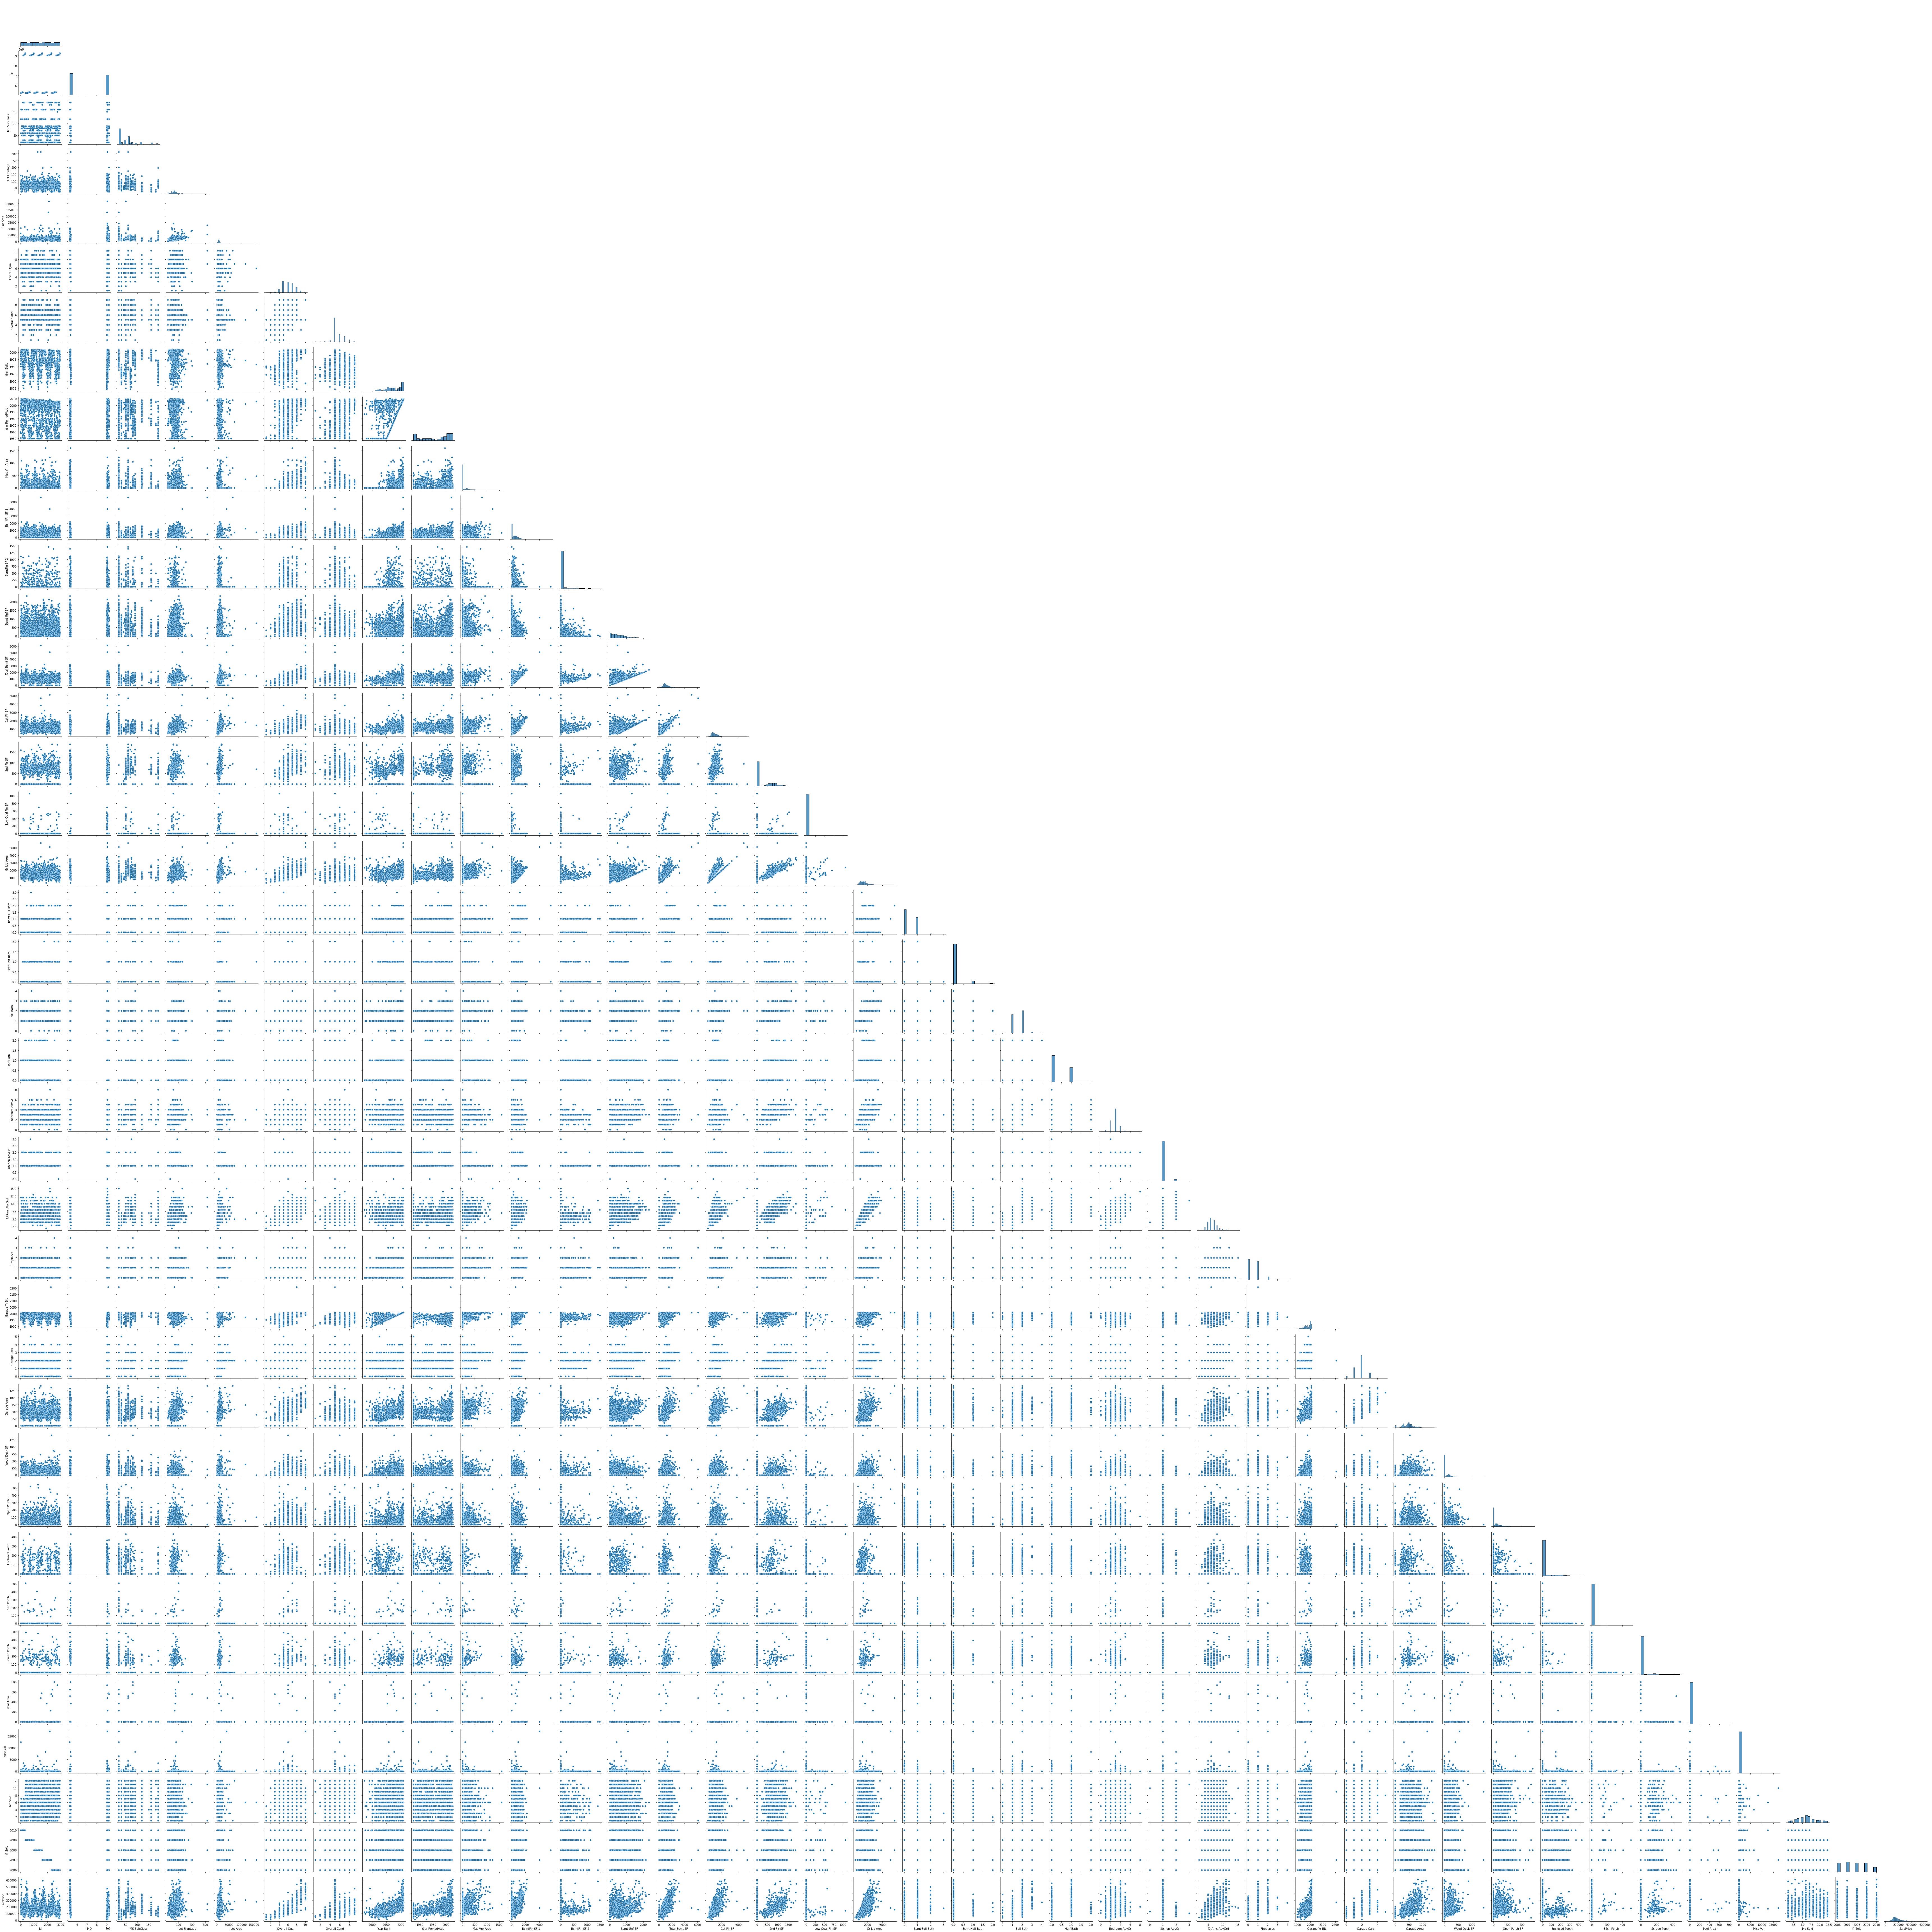

In [12]:
plt.figure( figsize=(16,9))

sns.pairplot(data= housing_train, corner=True);

In [13]:
threshold =abs(0.25) 
hous_clea = housing_train.corr().columns[housing_train.corr()['SalePrice']> threshold]
hous_clea

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice'],
      dtype='object')

In [14]:
# the Z is the dataframe with the  numerical variables that has more than abs(0.25) of correlation with the saleprice .


Z = housing_train[hous_clea]
Z.head()
print(Z.shape)

(2051, 21)


In [15]:
Z.isnull().sum()

Lot Frontage      330
Lot Area            0
Overall Qual        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       22
BsmtFin SF 1        1
Total Bsmt SF       1
1st Flr SF          0
Gr Liv Area         0
Bsmt Full Bath      2
Full Bath           0
Half Bath           0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
Wood Deck SF        0
Open Porch SF       0
SalePrice           0
dtype: int64

In [16]:
Z.head()

Lot Frontage  Lot Area  Overall Qual  Year Built  Year Remod/Add  \
0           NaN     13517             6        1976            2005   
1          43.0     11492             7        1996            1997   
2          68.0      7922             5        1953            2007   
3          73.0      9802             5        2006            2007   
4          82.0     14235             6        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  Gr Liv Area  \
0         289.0         533.0          725.0         725         1479   
1         132.0         637.0          913.0         913         2122   
2           0.0         731.0         1057.0        1057         1057   
3           0.0           0.0          384.0         744         1444   
4           0.0           0.0          676.0         831         1445   

   Bsmt Full Bath  Full Bath  Half Bath  TotRms AbvGrd  Fireplaces  \
0             0.0          2          1              6           0   
1             1.0          2          1              8           1   
2             1.0          1          0              5           0   
3             0.0          2          1              7           0   
4             0.0          2          0              6           0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1976.0          2.0        475.0             0             44   
1         1997.0          2.0        559.0             0             74   
2         1953.0          1.0        246.0             0             52   
3         2007.0          2.0        400.0           100              0   
4         1957.0          2.0        484.0             0             59   

   SalePrice  
0     130500  
1     220000  
2     109000  
3     174000  
4     138500

In [17]:
Z['Garage Yr Blt'] = Z['Garage Yr Blt'].fillna(Z['Year Built'])

<ipython-input-17-0929eeccc6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['Garage Yr Blt'] = Z['Garage Yr Blt'].fillna(Z['Year Built'])


In [18]:
print(Z['Lot Frontage'].mean())
Z['Lot Frontage'] = Z['Lot Frontage'].fillna(Z['Lot Frontage'].mean())
Z['Mas Vnr Area'] = Z['Mas Vnr Area'].fillna(Z['Mas Vnr Area'].mean())
Z['BsmtFin SF 1'] = Z['BsmtFin SF 1'].fillna(Z['BsmtFin SF 1'].mean())
Z['Total Bsmt SF'] = Z['Total Bsmt SF'].fillna(Z['Total Bsmt SF'].mean())
Z['Garage Area'] = Z['Garage Area'].fillna(Z['Garage Area'].mean())

69.05520046484602


<ipython-input-18-dcb52e188754>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['Lot Frontage'] = Z['Lot Frontage'].fillna(Z['Lot Frontage'].mean())
<ipython-input-18-dcb52e188754>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['Mas Vnr Area'] = Z['Mas Vnr Area'].fillna(Z['Mas Vnr Area'].mean())
<ipython-input-18-dcb52e188754>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [19]:
Z['Bsmt Full Bath'] = Z['Bsmt Full Bath'].fillna(Z['Bsmt Full Bath'].mode()[0])
Z['Garage Cars'] = Z['Garage Cars'].fillna(Z['Garage Cars'].mode()[0])


<ipython-input-19-c5140f986ed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['Bsmt Full Bath'] = Z['Bsmt Full Bath'].fillna(Z['Bsmt Full Bath'].mode()[0])
<ipython-input-19-c5140f986ed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['Garage Cars'] = Z['Garage Cars'].fillna(Z['Garage Cars'].mode()[0])


In [20]:
Z.isnull().sum()

Lot Frontage      0
Lot Area          0
Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    0
Full Bath         0
Half Bath         0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
SalePrice         0
dtype: int64

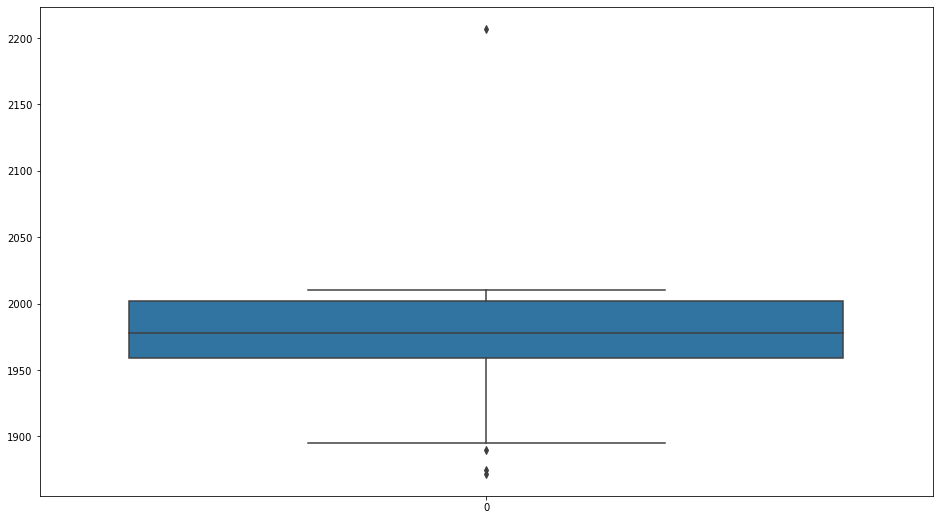

In [21]:
plt.figure( figsize=(16,9))

sns.boxplot(data= Z['Garage Yr Blt']);



<Figure size 1152x648 with 0 Axes>

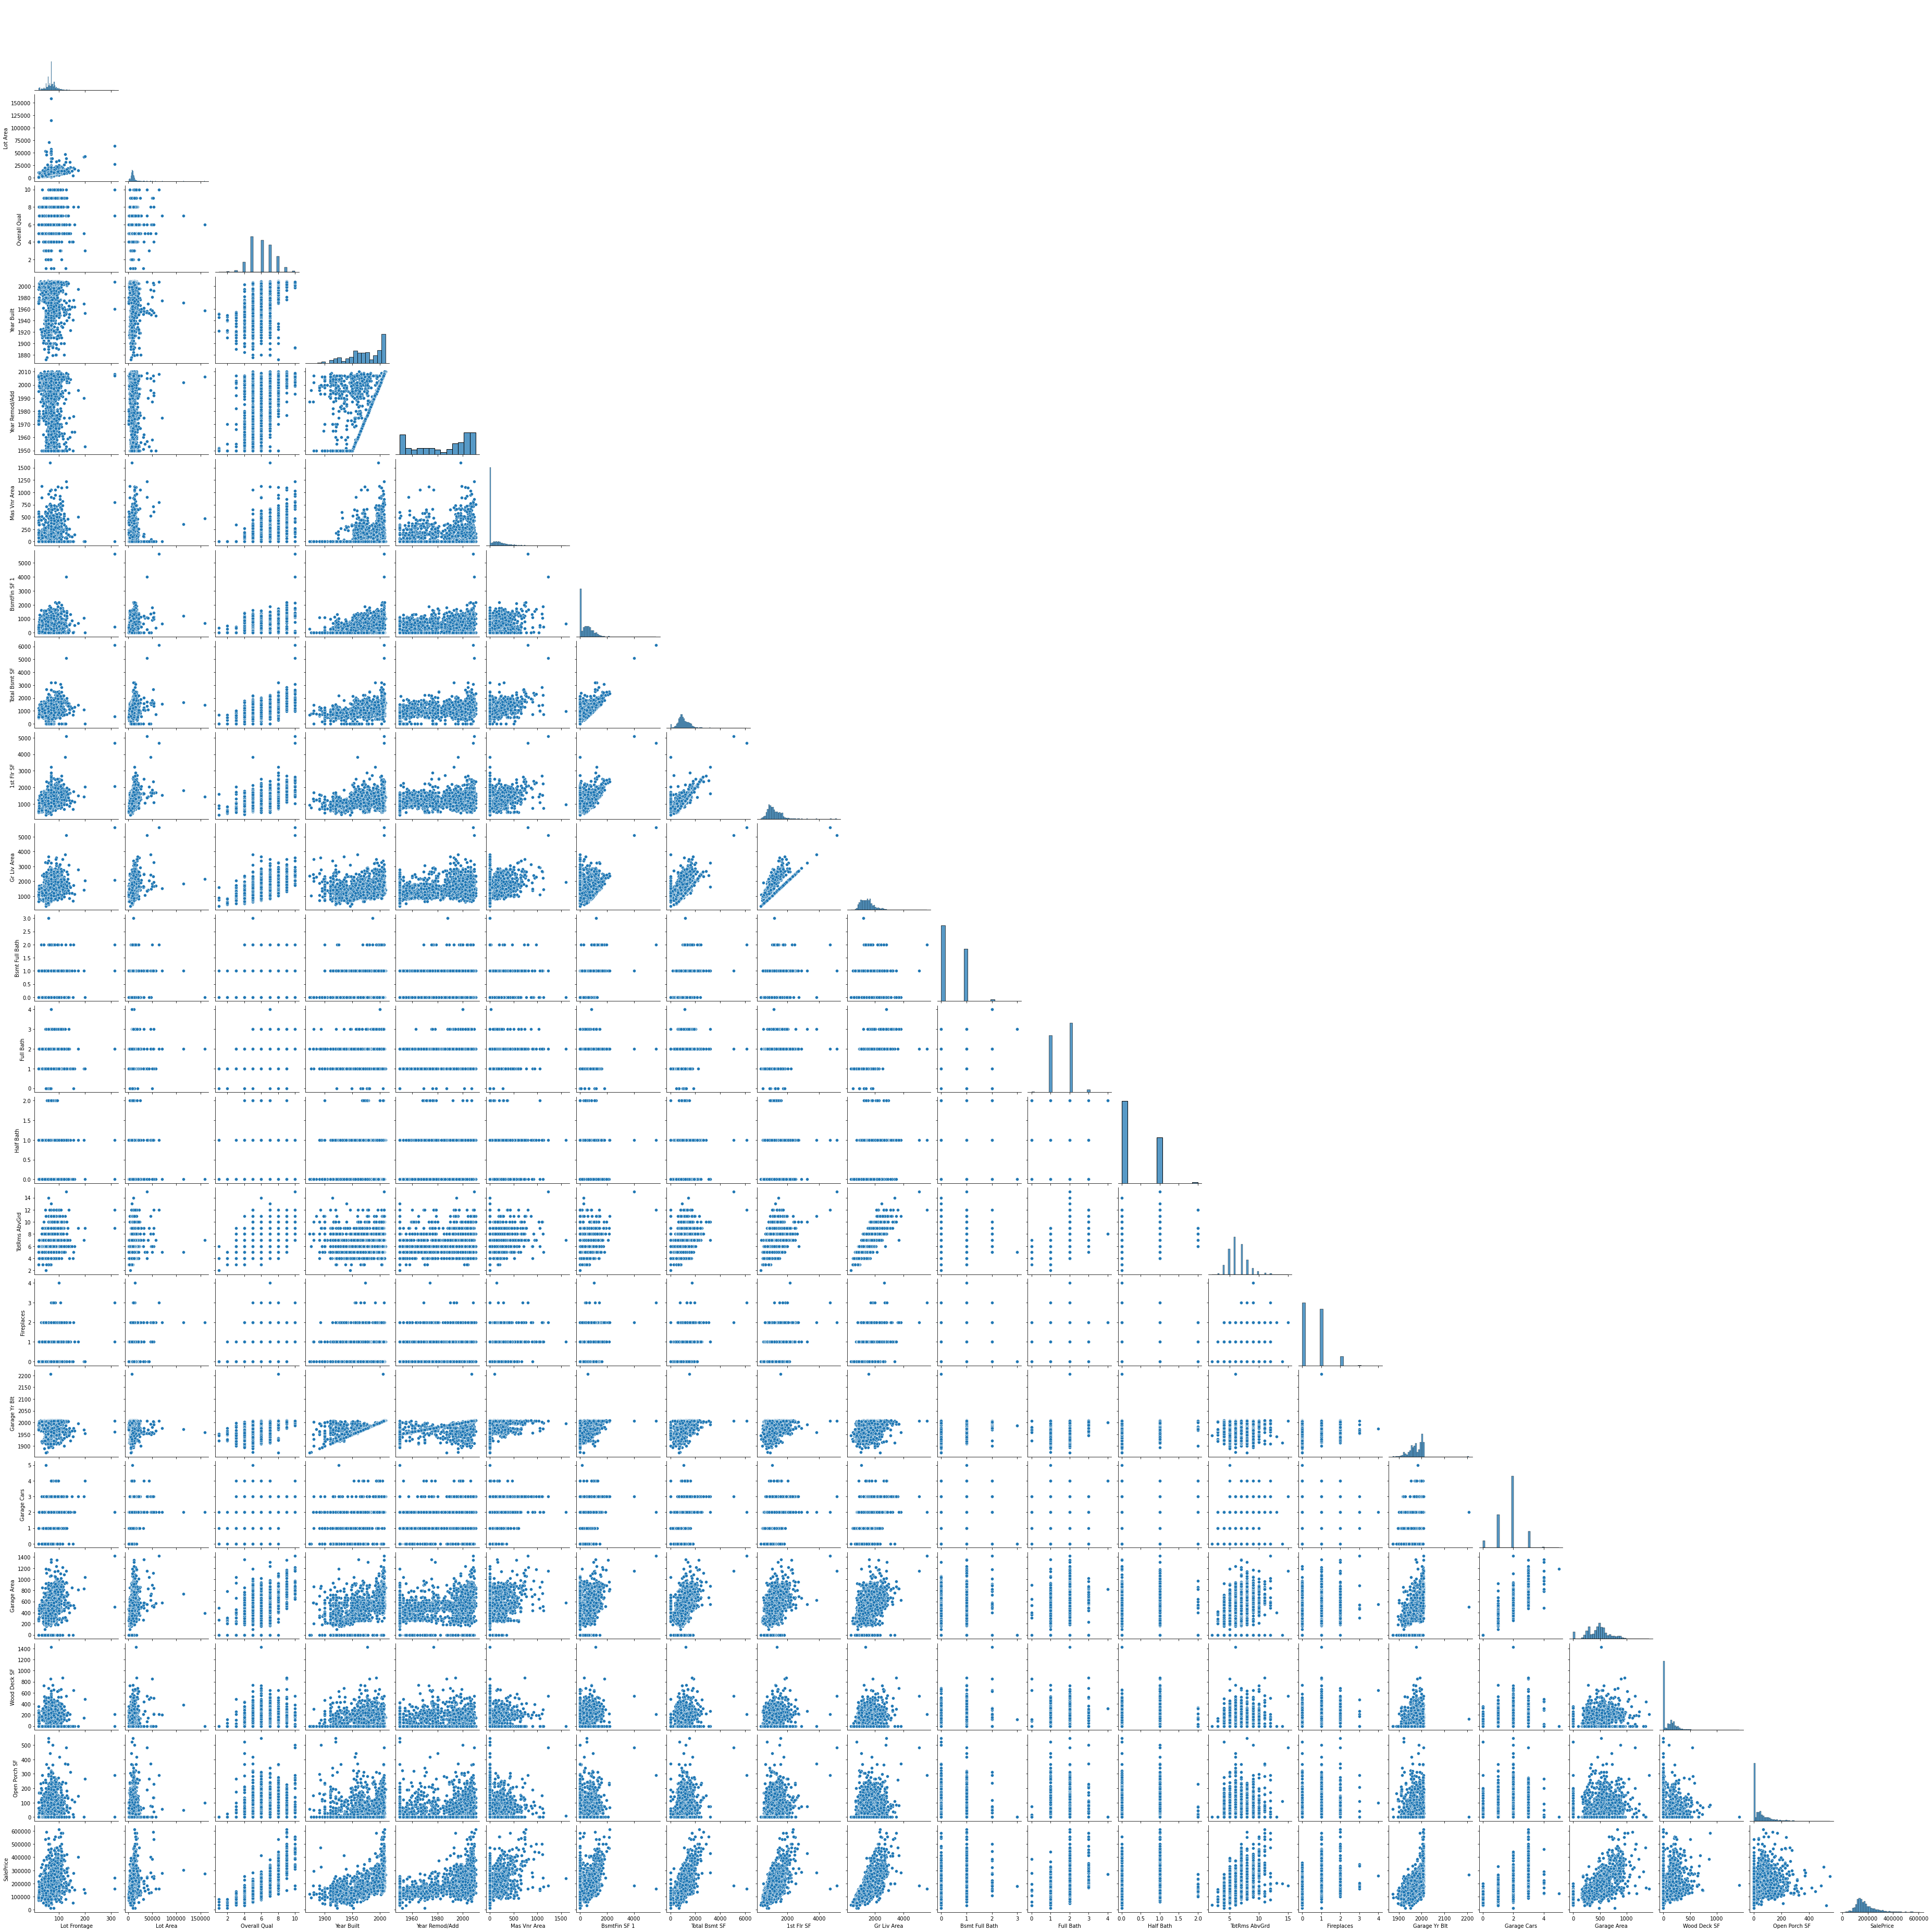

In [22]:
plt.figure( figsize=(16,9))

sns.pairplot(data= Z, corner=True);

In [23]:
pd.options.display.max_columns = None
housing_clen= housing_train.drop(columns=['Alley', 'Fireplace Qu','Pool QC','Fence','Misc Feature'])
housing_clen.head()


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4       

In [24]:
housing_clen.shape

(2051, 76)

In [25]:
# Isolate the dataframe with the categorical features 
#clean them

cat_housing_clen = housing_clen.select_dtypes(include=['object'])
cat_housing_clen.head(2)

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      HdBoard      Plywood      BrkFace         Gd         TA   
1   CompShg      VinylSd      VinylSd      BrkFace         Gd         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            No            GLQ            Unf   
1      PConc        Gd        TA            No            GLQ            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         Ex           Y      SBrkr           Gd        Typ   

  Garage Type Garage Finish Garage Qual Garage Cond Paved Drive Sale Type  
0      Attchd           RFn          TA          TA           Y       WD   
1      Attchd           RFn          TA          TA           Y       WD

In [26]:
cat_housing_clen.isnull().sum()

MS Zoning           0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          55
Bsmt Cond          55
Bsmt Exposure      58
BsmtFin Type 1     55
BsmtFin Type 2     56
Heating             0
Heating QC          0
Central Air         0
Electrical          0
Kitchen Qual        0
Functional          0
Garage Type       113
Garage Finish     114
Garage Qual       114
Garage Cond       114
Paved Drive         0
Sale Type           0
dtype: int64

In [27]:
housing_clen.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [28]:
#X is the dataframe with all the numerical data 
#I can start by doing a model to see if I use only the columns with numerical data what I can find.

X_num = housing_train._get_numeric_data().drop(columns="SalePrice")
features = list(X_num.columns)
y = housing_train['SalePrice']
X_num.head()

Id        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0  109  533352170           60           NaN     13517             6   
1  544  531379050           60          43.0     11492             7   
2  153  535304180           20          68.0      7922             5   
3  318  916386060           60          73.0      9802             5   
4  255  906425045           50          82.0     14235             6   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0             8        1976            2005         289.0         533.0   
1             5        1996            1997         132.0         637.0   
2             7        1953            2007           0.0         731.0   
3             5        2006            2007           0.0           0.0   
4             8        1900            1993           0.0           0.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0        192.0          725.0         725         754   
1           0.0        276.0          913.0         913        1209   
2           0.0        326.0         1057.0        1057           0   
3           0.0        384.0          384.0         744         700   
4           0.0        676.0          676.0         831         614   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          1              3              1              6           0   
1          1              4              1              8           1   
2          0              3              1              5           0   
3          1              3              1              7           0   
4          0              3              1              6           0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1976.0          2.0        475.0             0             44   
1         1997.0          2.0        559.0             0             74   
2         1953.0          1.0        246.0             0             52   
3         2007.0          2.0        400.0           100              0   
4         1957.0          2.0        484.0             0             59   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  \
0               0           0             0          0         0        3   
1               0           0             0          0         0        4   
2               0           0             0          0         0        1   
3               0           0             0          0         0        4   
4               0           0             0          0         0        3   

   Yr Sold  
0     2010  
1     2009  
2     2010  
3     2010  
4     2010

In [29]:
X_num.shape

(2051, 38)

In [30]:
X_num.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [31]:
X_num['Garage Yr Blt'].fillna(X_num['Year Built'])

0       1976.0
1       1997.0
2       1953.0
3       2007.0
4       1957.0
5       1966.0
6       2005.0
7       1959.0
8       1952.0
9       1969.0
10      1971.0
11      2005.0
12      1900.0
13      2000.0
14      2007.0
15      2004.0
16      1916.0
17      1963.0
18      1977.0
19      2009.0
20      1968.0
21      2000.0
22      2005.0
23      1992.0
24      1955.0
25      1961.0
26      1973.0
27      1937.0
28      1895.0
29      2003.0
30      1981.0
31      1931.0
32      1995.0
33      1952.0
34      2007.0
35      1958.0
36      1977.0
37      1977.0
38      1973.0
39      1995.0
40      1965.0
41      2006.0
42      1978.0
43      1954.0
44      1965.0
45      1935.0
46      1977.0
47      1931.0
48      1954.0
49      2003.0
50      2000.0
51      1981.0
52      1978.0
53      1970.0
54      1951.0
55      1969.0
56      2004.0
57      1954.0
58      1953.0
59      1996.0
60      1999.0
61      2007.0
62      1977.0
63      1920.0
64      1955.0
65      2007.0
66      19

In [32]:
# use the train-split on our first X_num which are all the numerical columns
# calculating the baseline using the linear regrassion 
# first I have model prep as scaling 
#then use cross validation to evaluate our model
 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, train_size=0.3, random_state=50)

In [34]:
X_train.head()

Id        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
2019  2167  907420110           60          64.0      9045             5   
653   1417  905480150           50          60.0      9600             6   
1097   799  905480210           70          60.0      9084             4   
2004  1843  533213130          160          24.0      2280             6   
1326  1423  906223220           80          85.0     10541             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
2019             5        2005            2005           0.0           0.0   
653              5        1924            1950           0.0           0.0   
1097             5        1940            1950           0.0           0.0   
2004             5        1999            1999         342.0         565.0   
1326             5        1996            1996           0.0           0.0   

      BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
2019           0.0        768.0          768.0         768         768   
653            0.0        572.0          572.0         572         524   
1097           0.0        755.0          755.0         755         755   
2004           0.0        179.0          744.0         757         744   
1326           0.0        672.0          672.0        1302         735   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
2019                0         1536             0.0             0.0          2   
653                 0         1096             0.0             0.0          1   
1097                0         1510             1.0             0.0          1   
2004                0         1501             1.0             0.0          2   
1326                0         2037             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
2019          1              3              1              6           0   
653           0              2              1              5           0   
1097          0              4              1              7           1   
2004          1              3              1              6           1   
1326          1              3              1              8           1   

      Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
2019         2005.0          2.0        400.0             0             40   
653             NaN          0.0          0.0             0              8   
1097         1940.0          1.0        296.0           120              0   
2004         1999.0          2.0        440.0             0              0   
1326         1996.0          2.0        472.0           100             33   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  \
2019               0           0             0          0         0        6   
653              128           0             0          0         0        4   
1097               0           0             0          0         0       10   
2004               0           0             0          0         0        9   
1326               0           0             0          0         0        2   

      Yr Sold  
2019     2007  
653      2008  
1097     2009  
2004     2007  
1326     2008

In [35]:
X_train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       108
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         7
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       46
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [36]:
X_train['Garage Yr Blt']

2019    2005.0
653        NaN
1097    1940.0
2004    1999.0
1326    1996.0
1121    1993.0
635     1951.0
1542    1994.0
926     1980.0
67      2004.0
595     1977.0
281     2008.0
563     1988.0
289     1997.0
1409    1997.0
750     1999.0
686     1927.0
1003    2002.0
1346    1998.0
444     1972.0
121     1956.0
223     1960.0
1959    1961.0
1662    2003.0
362     1938.0
2003    1962.0
2020    2000.0
1952       NaN
1322    1969.0
170     1954.0
432     1930.0
102     1976.0
1005    1980.0
372     1990.0
1759    1941.0
2038    1965.0
268     2001.0
1260    1994.0
402     1976.0
397     1968.0
1001    1965.0
953     2006.0
1552    1973.0
1211    1986.0
1724    2007.0
1551    1996.0
1162    2004.0
438     1966.0
1330    1997.0
1929    2004.0
1456    2007.0
1229    2008.0
1016    1997.0
422     2007.0
1942    1963.0
136        NaN
960     2008.0
1911    1989.0
15      2004.0
290     1970.0
1112    2001.0
869     1955.0
600     2000.0
1331    1953.0
1030    2000.0
1155    2005.0
198     20

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imp = SimpleImputer(strategy='mean')
mean_imputed_mval = imp.fit_transform(X_train)
mean_imputed_mval

array([[2.1670000e+03, 9.0742011e+08, 6.0000000e+01, ..., 0.0000000e+00,
        6.0000000e+00, 2.0070000e+03],
       [1.4170000e+03, 9.0548015e+08, 5.0000000e+01, ..., 0.0000000e+00,
        4.0000000e+00, 2.0080000e+03],
       [7.9900000e+02, 9.0548021e+08, 7.0000000e+01, ..., 0.0000000e+00,
        1.0000000e+01, 2.0090000e+03],
       ...,
       [1.1180000e+03, 5.2843112e+08, 6.0000000e+01, ..., 0.0000000e+00,
        7.0000000e+00, 2.0080000e+03],
       [8.7600000e+02, 9.0729007e+08, 2.0000000e+01, ..., 0.0000000e+00,
        6.0000000e+00, 2.0090000e+03],
       [2.2370000e+03, 9.1020118e+08, 7.0000000e+01, ..., 0.0000000e+00,
        3.0000000e+00, 2.0070000e+03]])

In [39]:
mean_imputed_mvaltest = imp.transform(X_test)
mean_imputed_mvaltest

array([[2.7300000e+03, 9.0530008e+08, 2.0000000e+01, ..., 0.0000000e+00,
        6.0000000e+00, 2.0060000e+03],
       [2.4330000e+03, 5.2823513e+08, 6.0000000e+01, ..., 0.0000000e+00,
        1.0000000e+01, 2.0060000e+03],
       [7.3100000e+02, 9.0320108e+08, 5.0000000e+01, ..., 0.0000000e+00,
        1.0000000e+01, 2.0090000e+03],
       ...,
       [4.5500000e+02, 5.2817505e+08, 1.2000000e+02, ..., 0.0000000e+00,
        5.0000000e+00, 2.0090000e+03],
       [1.5050000e+03, 9.0822517e+08, 1.9000000e+02, ..., 0.0000000e+00,
        5.0000000e+00, 2.0080000e+03],
       [1.7010000e+03, 5.2811804e+08, 6.0000000e+01, ..., 0.0000000e+00,
        5.0000000e+00, 2.0070000e+03]])

In [40]:
X_clean_test = pd.DataFrame(mean_imputed_mvaltest,columns=X_test.columns)

In [41]:
X_clean_train = pd.DataFrame(mean_imputed_mval,columns=X_train.columns)
X_clean_train.head()

Id          PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0  2167.0  907420110.0         60.0          64.0    9045.0           5.0   
1  1417.0  905480150.0         50.0          60.0    9600.0           6.0   
2   799.0  905480210.0         70.0          60.0    9084.0           4.0   
3  1843.0  533213130.0        160.0          24.0    2280.0           6.0   
4  1423.0  906223220.0         80.0          85.0   10541.0           7.0   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0           5.0      2005.0          2005.0           0.0           0.0   
1           5.0      1924.0          1950.0           0.0           0.0   
2           5.0      1940.0          1950.0           0.0           0.0   
3           5.0      1999.0          1999.0         342.0         565.0   
4           5.0      1996.0          1996.0           0.0           0.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0        768.0          768.0       768.0       768.0   
1           0.0        572.0          572.0       572.0       524.0   
2           0.0        755.0          755.0       755.0       755.0   
3           0.0        179.0          744.0       757.0       744.0   
4           0.0        672.0          672.0      1302.0       735.0   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0              0.0       1536.0             0.0             0.0        2.0   
1              0.0       1096.0             0.0             0.0        1.0   
2              0.0       1510.0             1.0             0.0        1.0   
3              0.0       1501.0             1.0             0.0        2.0   
4              0.0       2037.0             0.0             0.0        2.0   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0        1.0            3.0            1.0            6.0         0.0   
1        0.0            2.0            1.0            5.0         0.0   
2        0.0            4.0            1.0            7.0         1.0   
3        1.0            3.0            1.0            6.0         1.0   
4        1.0            3.0            1.0            8.0         1.0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0    2005.000000          2.0        400.0           0.0           40.0   
1    1980.093146          0.0          0.0           0.0            8.0   
2    1940.000000          1.0        296.0         120.0            0.0   
3    1999.000000          2.0        440.0           0.0            0.0   
4    1996.000000          2.0        472.0         100.0           33.0   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  \
0             0.0         0.0           0.0        0.0       0.0      6.0   
1           128.0         0.0           0.0        0.0       0.0      4.0   
2             0.0         0.0           0.0        0.0       0.0     10.0   
3             0.0         0.0           0.0        0.0       0.0      9.0   
4             0.0         0.0           0.0        0.0       0.0      2.0   

   Yr Sold  
0   2007.0  
1   2008.0  
2   2009.0  
3   2007.0  
4   2008.0

In [42]:
X_clean_train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64

In [43]:
print(X_train.shape)
print (X_test.shape)

(615, 38)
(1436, 38)


In [44]:
ssc = StandardScaler()
X_1 = ssc.fit_transform(X_clean_train)
X_1_test = ssc.transform(X_clean_test)


In [45]:
my_features = X_clean_train.columns
my_features

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [46]:
y_train.head()

2019    167000
653      79000
1097    108000
2004    176500
1326    229000
Name: SalePrice, dtype: int64

In [47]:
lr = LinearRegression()


In [48]:
# k = 6

lr_scores = cross_val_score(lr,X_1,y_train, cv=6)
lr_scores

array([-0.11607356,  0.85674092,  0.78232923,  0.76137397,  0.84712995,
       -0.47563995])

In [49]:
print(lr_scores.mean())
print(lr_scores.std())

0.4426434273118757
0.5334589513436688


In [50]:
#model fitting and evaluation 

In [51]:
lr.fit(X_1,y_train)

LinearRegression()

In [52]:
# the trainning score
lr.score(X_1,y_train)

0.8291188834430221

In [53]:
resi = y_test -lr.predict(X_1_test) 
resi


2037      4626.990859
126     -32117.139585
912       2927.313860
1122    -40036.336841
271      -4077.162180
386       7381.085941
640        162.367514
1207    -38335.113450
82       11528.524894
1105    -19251.379930
1104    -15721.722691
66       -3528.505190
1599     34397.792592
1101    -17208.594541
240     -92805.712734
1756     -4194.160735
208      29575.116620
1332     -8837.279087
288     -28723.731957
81      120390.723325
1572    -46640.034716
986      67718.530703
299     -15181.319952
1355    -19691.141946
998      43443.887329
380      20717.022798
1000    -41338.970360
923       -118.007023
145     -28279.980899
1698     -2378.850812
1667       662.987126
123       8524.695056
1823    -19136.568204
1339     13922.314859
496       2954.319657
1462      1598.434343
1392     10387.837749
1536    -27065.922933
633      43351.786948
674       4360.205735
1412     -4903.355373
969     -22323.533291
9       -46296.343890
1665    -30061.710430
1088     15697.088429
880      -

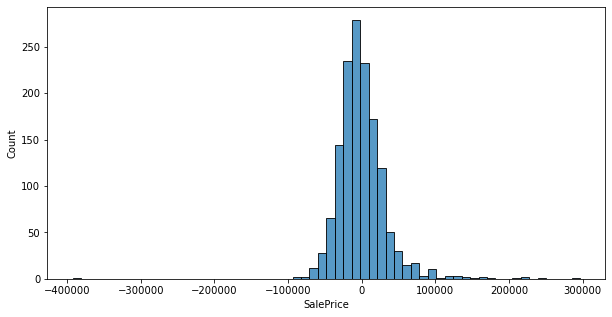

In [54]:
plt.figure(figsize=(10,5))
           
sns.histplot(resi, bins=60);

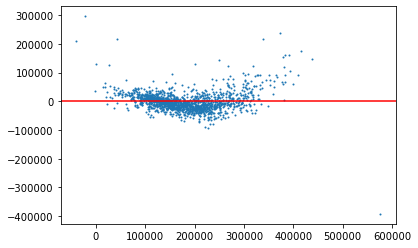

In [55]:
plt.scatter(lr.predict(X_1_test), resi, s=1)
plt.axhline(0, color="red");

In [56]:
#the test score
lr.score(X_1_test,y_test)

0.8039499818665119

In [57]:
# prediction 
preds= lr.predict(X_1_test)
print(mean_squared_error(y_test, preds, squared=False))

34708.54629604068


In [58]:
preds.shape

(1436,)

In [59]:

housing_test_num = housing_test._get_numeric_data()
housing_cleaned_test= ssc.transform(housing_test_num)
me_imp_mval_test = imp.transform(housing_test_num)
housing_clean_test = pd.DataFrame(me_imp_mval_test,columns=housing_test_num.columns)


In [60]:
housing_clean_test.shape

(879, 38)

In [61]:
X_submission = housing_clean_test[my_features]
pred_submission = lr.predict(X_submission)
print(pred_submission.shape)

(879,)


In [62]:
housing_clean_test['SalePrice'] = pred_submission
housing_clean_test.head(2)

Id          PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0  2658.0  902301120.0        190.0     69.000000    9142.0           6.0   
1  2718.0  905108090.0         90.0     70.201183    9662.0           5.0   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0           8.0      1910.0          1950.0           0.0           0.0   
1           4.0      1977.0          1977.0           0.0           0.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0       1020.0         1020.0       908.0      1020.0   
1           0.0       1967.0         1967.0      1967.0         0.0   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0              0.0       1928.0             0.0             0.0        2.0   
1              0.0       1967.0             0.0             0.0        2.0   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0        0.0            4.0            2.0            9.0         0.0   
1        0.0            6.0            2.0           10.0         0.0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1910.0          1.0        440.0           0.0           60.0   
1         1977.0          2.0        580.0         170.0            0.0   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  \
0           112.0         0.0           0.0        0.0       0.0      4.0   
1             0.0         0.0           0.0        0.0       0.0      8.0   

   Yr Sold     SalePrice  
0   2006.0  1.684910e+19  
1   2006.0  1.695417e+19

In [63]:
submission = housing_clean_test[['Id', 'SalePrice']].sort_values(by='Id')
submission.head()

Id     SalePrice
704   2.0  8.204431e+18
706   4.0  1.758746e+19
120   6.0  1.360715e+19
312   7.0  1.118601e+19
401  17.0  1.474879e+19

In [64]:
submission.dtypes

Id           float64
SalePrice    float64
dtype: object

In [65]:
submission.shape

(879, 2)

In [66]:
submission['Id'] = housing_test['Id']

In [67]:
submission['Id']= submission['Id'].astype(int)

In [68]:
submission.head()

Id     SalePrice
704   2  8.204431e+18
706   4  1.758746e+19
120   6  1.360715e+19
312   7  1.118601e+19
401  17  1.474879e+19

In [69]:
submission.to_csv("first1_model_I.I.csv", index=False)

## second model 

In [70]:
cat_housing_clen.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [71]:
Z.head()
print(Z.shape)

(2051, 21)


In [72]:

cat_dummies = pd.get_dummies( cat_housing_clen['Neighborhood'], prefix='Neighborhood')
cat_dummies.head(2)


Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
0                    0                     0                    0   
1                    0                     0                    0   

   Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    1                     0   
1                   0                    0                     1   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   

   Neighborhood_Veenker  
0                     0  
1                     0

In [73]:
my_columns = ['Neighborhood','Utilities','Bldg Type','Kitchen Qual']
cat_colms = cat_housing_clen [my_columns]
cat_colms.head()

Neighborhood Utilities Bldg Type Kitchen Qual
0       Sawyer    AllPub      1Fam           Gd
1      SawyerW    AllPub      1Fam           Gd
2        NAmes    AllPub      1Fam           Gd
3       Timber    AllPub      1Fam           TA
4      SawyerW    AllPub      1Fam           TA

In [74]:
hous_feat = pd.concat([Z,cat_colms],axis=1)
hous_feat.head()

Lot Frontage  Lot Area  Overall Qual  Year Built  Year Remod/Add  \
0       69.0552     13517             6        1976            2005   
1       43.0000     11492             7        1996            1997   
2       68.0000      7922             5        1953            2007   
3       73.0000      9802             5        2006            2007   
4       82.0000     14235             6        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  Gr Liv Area  \
0         289.0         533.0          725.0         725         1479   
1         132.0         637.0          913.0         913         2122   
2           0.0         731.0         1057.0        1057         1057   
3           0.0           0.0          384.0         744         1444   
4           0.0           0.0          676.0         831         1445   

   Bsmt Full Bath  Full Bath  Half Bath  TotRms AbvGrd  Fireplaces  \
0             0.0          2          1              6           0   
1             1.0          2          1              8           1   
2             1.0          1          0              5           0   
3             0.0          2          1              7           0   
4             0.0          2          0              6           0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1976.0          2.0        475.0             0             44   
1         1997.0          2.0        559.0             0             74   
2         1953.0          1.0        246.0             0             52   
3         2007.0          2.0        400.0           100              0   
4         1957.0          2.0        484.0             0             59   

   SalePrice Neighborhood Utilities Bldg Type Kitchen Qual  
0     130500       Sawyer    AllPub      1Fam           Gd  
1     220000      SawyerW    AllPub      1Fam           Gd  
2     109000        NAmes    AllPub      1Fam           Gd  
3     174000       Timber    AllPub      1Fam           TA  
4     138500      SawyerW    AllPub      1Fam           TA

In [75]:
hous_feat.shape

(2051, 25)

In [ ]:
hous_feat.shape

In [76]:
X_2 = hous_feat.drop(columns="SalePrice")
y_2 = hous_feat['SalePrice']

X_2_dummies = pd.get_dummies(X_2,columns=['Neighborhood','Utilities','Bldg Type','Kitchen Qual'],drop_first=True)
X_2_dummies.head()

Lot Frontage  Lot Area  Overall Qual  Year Built  Year Remod/Add  \
0       69.0552     13517             6        1976            2005   
1       43.0000     11492             7        1996            1997   
2       68.0000      7922             5        1953            2007   
3       73.0000      9802             5        2006            2007   
4       82.0000     14235             6        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  Gr Liv Area  \
0         289.0         533.0          725.0         725         1479   
1         132.0         637.0          913.0         913         2122   
2           0.0         731.0         1057.0        1057         1057   
3           0.0           0.0          384.0         744         1444   
4           0.0           0.0          676.0         831         1445   

   Bsmt Full Bath  Full Bath  Half Bath  TotRms AbvGrd  Fireplaces  \
0             0.0          2          1              6           0   
1             1.0          2          1              8           1   
2             1.0          1          0              5           0   
3             0.0          2          1              7           0   
4             0.0          2          0              6           0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1976.0          2.0        475.0             0             44   
1         1997.0          2.0        559.0             0             74   
2         1953.0          1.0        246.0             0             52   
3         2007.0          2.0        400.0           100              0   
4         1957.0          2.0        484.0             0             59   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   1   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                   

In [146]:
X_2_dummies.shape

(2051, 56)

In [207]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_dummies, y_2, test_size=0.2)

In [208]:
Z_S_train = ss.fit_transform(X_2_train)
Z_S_test = ss.transform(X_2_test)

In [110]:
lasso = LassoCV(n_alphas=200 , cv=3)

ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100), scoring='r2',cv=3)

In [209]:
print(Z_S_train.shape, y_2_train.shape) 
print (Z_S_test.shape, y_2_test.shape)

(1640, 56) (1640,)
(411, 56) (411,)


In [211]:
lr.fit(Z_S_train,y_2_train)

LinearRegression()

In [212]:
preds_2 = lr.predict(Z_S_test)

In [213]:
lr.score(Z_S_train,y_2_train)

0.867969733092463

Text(0, 0.5, 'Predictions')

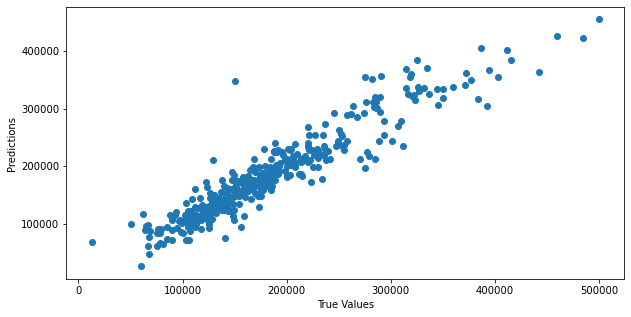

In [214]:
plt.figure(figsize=(10,5))
plt.scatter(y_2_test, preds_2)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [215]:
lr.score(Z_S_test,y_2_test)

0.8863454715719905

In [216]:
lr_scores_2 = cross_val_score(lr,Z_S_train,y_2_train, cv=3)
lr_scores_2

array([-8.02345562e+24,  8.26107107e-01,  7.99851695e-01])

In [217]:
print(lr_scores_2.mean())
print(lr_scores_2.std())

-2.674485208076859e+24
3.7822932536285223e+24


In [218]:
predi_2 = cross_val_predict(lr,Z_S_train,y_2_train, cv=3)

Text(0, 0.5, 'Predictions')

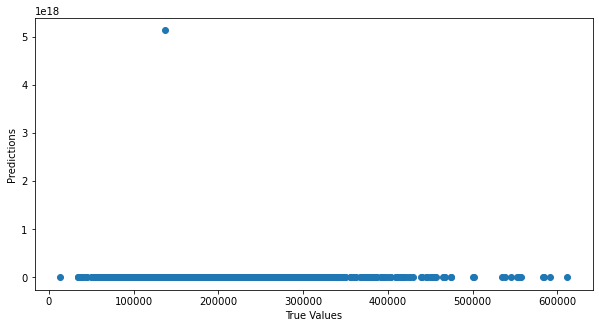

In [219]:
plt.figure(figsize=(10,5))
plt.scatter(y_2_train, predi_2)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [107]:
accuracy = metrics.r2_score(y_2_train, predi_2)
accuracy

0.8640539434392729

In [229]:
resi_2 = y_2_test -lr.predict(Z_S_test) 
resi

2037      4626.990859
126     -32117.139585
912       2927.313860
1122    -40036.336841
271      -4077.162180
386       7381.085941
640        162.367514
1207    -38335.113450
82       11528.524894
1105    -19251.379930
1104    -15721.722691
66       -3528.505190
1599     34397.792592
1101    -17208.594541
240     -92805.712734
1756     -4194.160735
208      29575.116620
1332     -8837.279087
288     -28723.731957
81      120390.723325
1572    -46640.034716
986      67718.530703
299     -15181.319952
1355    -19691.141946
998      43443.887329
380      20717.022798
1000    -41338.970360
923       -118.007023
145     -28279.980899
1698     -2378.850812
1667       662.987126
123       8524.695056
1823    -19136.568204
1339     13922.314859
496       2954.319657
1462      1598.434343
1392     10387.837749
1536    -27065.922933
633      43351.786948
674       4360.205735
1412     -4903.355373
969     -22323.533291
9       -46296.343890
1665    -30061.710430
1088     15697.088429
880      -

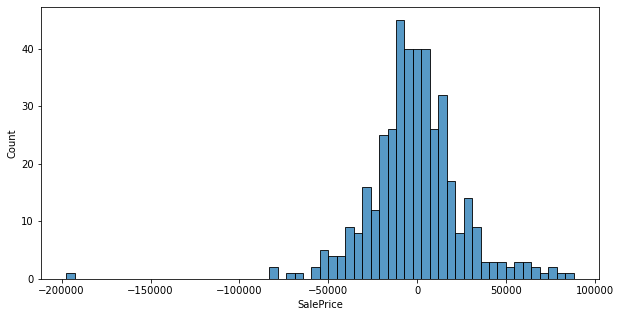

In [230]:
plt.figure(figsize=(10,5))
           
sns.histplot(resi_2, bins=60);

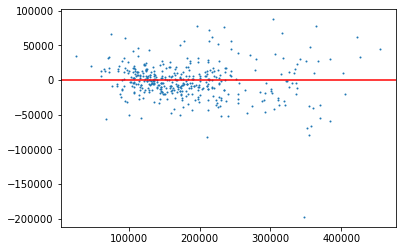

In [231]:
plt.scatter(lr.predict(Z_S_test), resi_2, s=1)
plt.axhline(0, color="red");

In [220]:
ridge.fit(Z_S_train,y_2_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=3, scoring='r2')

In [221]:
print(f"R2 ridge trainning:{ridge.score(Z_S_train,y_2_train)}")
print(f"R2 ridge test:{ridge.score(Z_S_test,y_2_test)}")

R2 ridge trainning:0.8678589941906091
R2 ridge test:0.8868669783225553


In [222]:
lasso.fit(Z_S_train,y_2_train)

LassoCV(cv=3, n_alphas=200)

In [223]:
print(f"R2 lasso trainning:{lasso.score(Z_S_train,y_2_train)}")
print(f"R2 lasso test:{lasso.score(Z_S_test,y_2_test)}")

R2 lasso trainning:0.8663421713339073
R2 lasso test:0.8893010216505045


In [224]:
lasso_scores_2 = cross_val_score(lasso,Z_S_train,y_2_train, cv=3 )
lasso_scores_2.mean(), lasso_scores_2.std()

(0.837854809979516, 0.029703829918341845)

In [225]:
ridge_scores_2 = cross_val_score(ridge,Z_S_train,y_2_train , cv=3)
ridge_scores_2.mean(), ridge_scores_2.std()

(0.8390141561871519, 0.02843636004203443)

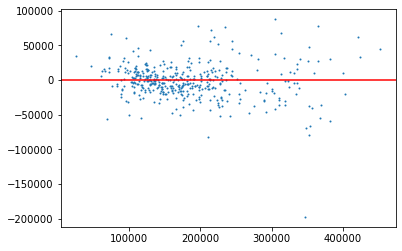

In [232]:
plt.scatter(ridge.predict(Z_S_test), resi_2, s=1)
plt.axhline(0, color="red");

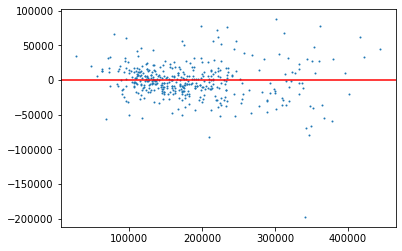

In [233]:
plt.scatter(lasso.predict(Z_S_test), resi_2, s=1)
plt.axhline(0, color="red");

In [118]:
from sklearn.linear_model import ElasticNetCV

In [226]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. 
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(Z_S_train, y_2_train)

# Generate predictions.
enet_model_preds = enet_model.predict(Z_S_test)
enet_model_preds_train = enet_model.predict(Z_S_train)

# Evaluate model.
print(enet_model.score(Z_S_train, y_2_train))
print(enet_model.score(Z_S_test, y_2_test))

0.8523655705459814
0.8876920989834793


In [239]:
lin_preds = lr.predict(Z_S_test)
lasso_preds = lasso.predict(Z_S_test)
ridge_preds = ridge.predict(Z_S_test)

In [238]:
# MSE for training
mean_squared_error(y_true=y_test, y_pred=lr.predict(Z_S_train))

ValueError: Found input variables with inconsistent numbers of samples: [1436, 1640]

In [135]:
X_2_train.shape

(1640, 56)

In [137]:
X_2_train.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'N

In [178]:
X_2.shape

(2051, 24)

In [194]:
X_2 = hous_feat.drop(columns="SalePrice")
y_2 = hous_feat['SalePrice']

X_2_dummies = pd.get_dummies(X_2,columns=['Neighborhood','Utilities','Bldg Type','Kitchen Qual'],drop_first=True)
X_2_dummies.head()

Lot Frontage  Lot Area  Overall Qual  Year Built  Year Remod/Add  \
0       69.0552     13517             6        1976            2005   
1       43.0000     11492             7        1996            1997   
2       68.0000      7922             5        1953            2007   
3       73.0000      9802             5        2006            2007   
4       82.0000     14235             6        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  Gr Liv Area  \
0         289.0         533.0          725.0         725         1479   
1         132.0         637.0          913.0         913         2122   
2           0.0         731.0         1057.0        1057         1057   
3           0.0           0.0          384.0         744         1444   
4           0.0           0.0          676.0         831         1445   

   Bsmt Full Bath  Full Bath  Half Bath  TotRms AbvGrd  Fireplaces  \
0             0.0          2          1              6           0   
1             1.0          2          1              8           1   
2             1.0          1          0              5           0   
3             0.0          2          1              7           0   
4             0.0          2          0              6           0   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1976.0          2.0        475.0             0             44   
1         1997.0          2.0        559.0             0             74   
2         1953.0          1.0        246.0             0             52   
3         2007.0          2.0        400.0           100              0   
4         1957.0          2.0        484.0             0             59   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   1   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                   

In [195]:
X_2_dummies.shape

(2051, 56)

In [ ]:
X_2_dummies_f= X_2_dummies.drop(columns=[''])

In [174]:

my_features_2 = list(hous_feat.columns)
print(my_features_2)

['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice', 'Neighborhood', 'Utilities', 'Bldg Type', 'Kitchen Qual']


In [245]:
my_features_2 = (hous_feat.drop(columns="SalePrice")).columns
X_2_sub = housing_test[my_features_2]
X_2_sub.head()
print(X_2_sub.shape)

(879, 24)


In [241]:
X_2_dummies.shape

(2051, 56)

In [177]:
X_2_sub.shape

(879, 24)

In [246]:
X_2_dum_sub = pd.get_dummies(X_2_sub,columns=['Neighborhood','Utilities','Bldg Type','Kitchen Qual'],drop_first=True)
X_2_dum_sub.head()

Lot Frontage  Lot Area  Overall Qual  Year Built  Year Remod/Add  \
0          69.0      9142             6        1910            1950   
1           NaN      9662             5        1977            1977   
2          58.0     17104             7        2006            2006   
3          60.0      8520             5        1923            2006   
4           NaN      9500             6        1963            1963   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  Gr Liv Area  \
0           0.0           0.0         1020.0         908         1928   
1           0.0           0.0         1967.0        1967         1967   
2           0.0         554.0          654.0         664         1496   
3           0.0           0.0          968.0         968          968   
4         247.0         609.0         1394.0        1394         1394   

   Bsmt Full Bath  Full Bath  Half Bath  TotRms AbvGrd  Fireplaces  \
0             0.0          2          0              9           0   
1             0.0          2          0             10           0   
2             1.0          2          1              7           1   
3             0.0          1          0              5           0   
4             1.0          1          1              6           2   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         1910.0          1.0        440.0             0             60   
1         1977.0          2.0        580.0           170              0   
2         2006.0          2.0        426.0           100             24   
3         1935.0          2.0        480.0             0              0   
4         1963.0          2.0        514.0             0             76   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     1                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   1                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     1   
1                     0 

In [247]:
X_2_dum_sub.shape

(879, 54)

In [175]:
X_2_dum_sub.shape

(879, 54)

In [202]:
X_2_dum_sub.isnull().sum()

Lot Frontage            0
Lot Area                0
Overall Qual            0
Year Built              0
Year Remod/Add          0
Mas Vnr Area            0
BsmtFin SF 1            0
Total Bsmt SF           0
1st Flr SF              0
Gr Liv Area             0
Bsmt Full Bath          0
Full Bath               0
Half Bath               0
TotRms AbvGrd           0
Fireplaces              0
Garage Yr Blt           0
Garage Cars             0
Garage Area             0
Wood Deck SF            0
Open Porch SF           0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_Greens     0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood

In [200]:
X_2_dum_sub['Garage Yr Blt'] = X_2_dum_sub['Garage Yr Blt'].fillna(X_2_dum_sub['Year Built'])
X_2_dum_sub['Lot Frontage'] = X_2_dum_sub ['Lot Frontage'].fillna(X_2_dum_sub['Lot Frontage'].mean())
X_2_dum_sub['Mas Vnr Area'] = X_2_dum_sub['Mas Vnr Area'].fillna(X_2_dum_sub['Mas Vnr Area'].mean())

In [243]:

pred_2_sub = lr.predict(X_2_dum_sub)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 56 is different from 54)